# Shrooms: Edible or Poisonous?

'Shrooming' -- the act of foraging for edible mushrooms in the forest -- is growing in popularity. However, this novel hobby presents new dangers: there are countless types of unique mushrooms, many of which can easily be misclassified. One small mistake in mushroom indentification can have enormous consequences. Accidentally ingesting a poisonous mushroom can lead to serious medical complications, and perhaps even death. In this notebook, I'll attempt to use data science methodologies to correctly identify a mushroom as either edible or poisonous.

In [1]:
# Start by making key imports: NumPy and Pandas
import numpy as np
import pandas as pd

In [2]:
# Read in CSV file of our data
shrooms = pd.read_csv('../datasets/mushrooms.csv')

In [3]:
# Use the .describe() attribute for initial analysis
shrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# Check the number of rows and columns in the dataset
shrooms.shape

(8124, 23)

In [5]:
# Count the number of nulls in the dataset
shrooms.isnull().sum()

# No nulls!

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# Check the data types of the dataset. All the values in the datasets are objects
shrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
# For each column, display the name of the column and the number of unique attributes for each column
for column in shrooms:
    print(column)
    print(shrooms[column].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


### Rename the data in the cells

This data doesn't offer much insight. Knowing that the next step in the process will be exploratory data analysis, I'd like to rename the individual letters to the words that they stand for. This will involve creating a `dictionary` to match the data with the words that they're the abbreviations of. This may sound a bit tedious, partially because it totally is. But this will also provide us with actual insights, rather than guesses as to what each data node means.

In [8]:
# First, let's create a dictionary that matches the data with the words that they denote. This information
#/n can be accessed on the same Kaggle website that this data was retrieved from : 
#/n https://www.kaggle.com/uciml/mushroom-classification

rename_data = {
    'class' : {
        'p' : 'poisonous',
        'e' : 'edible'
    },
    'cap-shape' : {
        'b' : 'bell',
        'c' : 'conical',
        'x' : 'convex',
        'f' : 'flat',
        'k' : 'knobbed',
        's' : 'subnken'
    },
    'cap-surface' : {
        'f' : 'fibrous',
        'g' : 'grooves',
        'y' : 'scaly',
        's' : 'smooth'
    },
    'cap-color' : {
        'n' : 'brown',
        'b' : 'buff',
        'c' : 'cinnamon',
        'g' : 'gray',
        'r' : 'green',
        'p' : 'pink',
        'u' : 'purple',
        'e' : 'red',
        'y' : 'yellow',
        'w' : 'white'
    },
    'bruises' : {
        't' : 'yes',
        'f' : 'no'
    },
    'odor' : {
        'a' : 'almond',
        'l' : 'anise',
        'c' : 'creosote',
        'y' : 'fishy',
        'f' : 'foul',
        'm' : 'musty',
        'n' : 'none',
        'p' : 'pungent',
        's' : 'spicy'
    },
    'gill-attachment' : {
        'a' : 'attached',
        'd' : 'detached',
        'f' : 'free',
        'n' : 'notched'
    },
    'gill-spacing' : {
        'c' : 'close',
        'w' : 'crowded',
        'd' : 'distant'
    },
    'gill-size' : {
        'b' : 'broad',
        'n' : 'narrow'
    },
    'gill-color' : {
        'k' : 'black',
        'n' : 'brown',
        'b' : 'buff',
        'h' : 'chocolate',
        'g' : 'gray',
        'r' : 'green',
        'o' : 'orange',
        'p' : 'pink',
        'u' : 'purple',
        'e' : 'red',
        'w' : 'white',
        'y' : 'yellow'
    },
    'stalk-shape' : {
        'e' : 'enlarging',
        't' : 'tapering'
    },
    'stalk-root' : {
        'b' : 'bulbous',
        'c' : 'club',
        'u' : 'cup',
        'e' : 'equal',
        'z' : 'rhizomorphs',
        'r' : 'rooted',
        '?' : 'missing'
    },
    'stalk-surface-above-ring' : {
        'f' : 'fibrous',
        'y' : 'scaly',
        'k' : 'silky',
        's' : 'smooth'
    },
    'stalk-surface-below-ring' : {
        'f' : 'fibrous',
        'y' : 'scaly',
        'k' : 'silky',
        's' : 'smooth'
    },
    'stalk-color-above-ring' : {
        'n' : 'brown',
        'b' : 'buff',
        'c' : 'cinnamon',
        'g' : 'gray',
        'o' : 'orange',
        'p' : 'pink',
        'e' : 'red',
        'w' : 'white',
        'y' : 'yellow'
    },
    'stalk-color-below-ring' : {
        'n' : 'brown',
        'b' : 'buff',
        'c' : 'cinnamon',
        'g' : 'gray',
        'o' : 'orange',
        'p' : 'pink',
        'e' : 'red',
        'w' : 'white',
        'y' : 'yellow'
    },
    'veil-type' : {
        'p' : 'partial',
        'u' : 'universal'
    },
    'veil-color' : {
        'n' : 'brown',
        'o' : 'orange',
        'w' : 'white',
        'y' : 'yellow'
    },
    'ring-number' : {
        'n' : 'none',
        'o' : 'one',
        't' : 'two'
    },
    'ring-type': {
        'c' : 'cobwebby',
        'e' : 'evanescent',
        'f' : 'flaring',
        'l' : 'large',
        'n' : 'none',
        'p' : 'pendant',
        's' : 'sheathing',
        'z' : 'zone'
    },
    'spore-print-color' : {
        'k' : 'black',
        'n' : 'brown',
        'b' : 'buff',
        'h' : 'chocolate',
        'r' : 'green',
        'o' : 'orange',
        'u' : 'purple',
        'w' : 'white',
        'y' : 'yellow'
    },
    'population' : {
        'a' : 'abundant',
        'c' : 'clustered',
        'n' : 'numerous',
        's' : 'scattered',
        'v' : 'several',
        'y' : 'solitary'
    },
    'habitat' : {
        'g' : 'grasses',
        'l' : 'leaves',
        'm' : 'meadows',
        'p' : 'paths',
        'u' : 'urban',
        'w' : 'waste',
        'd' : 'woods'
    }
}

**Change the data in the dataframe**

We'll do this by creating a `function` that will also leverage the `dictionary` that we just created, labeled `rename_data`.

In [9]:
# Define the function that takes in one argument: a dataframe.
def cell_change(df):
    
    # Create a new dataframe
    new_df = pd.DataFrame(columns = df.columns)
    
    # Loop through the columns in the inputted dataframe
    for column in df:
        new_column = []
        
        # Loop through the cells in the column in question of the inputted dataframe
        for cell in df[column]:
            
            # Find the appropriate value in the dictionary
            new_column.append(rename_data[column][cell])
        
        # Add list to the column in question in the new dataframe
        new_df[column] = new_column
        
    # Return the new dataframe    
    return new_df

In [10]:
# Change the information in the shrooms dataframe
shrooms = cell_change(shrooms)
shrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Exploratory Data Analysis

This classification problem will require creating dummy variables to quantify the data. Before doing so, we'll do some exploratory data anlysis to see if we see any interesting patterns in this dataset.

First, let's load in some data visualization libraries.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

As a reminder, let's take a look at the name of the columns in our `shrooms` dataset.

In [12]:
shrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### Loop through columns to create a visualization for each column

Creating multiple visuals at once will be relatively easy when using a `for loop`.

There will likely be some variables that won't yield any interesting insights visually; creating these `Count Plots` will quickly highlight which variables should and shouldn't be focused on for further data visualization.

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


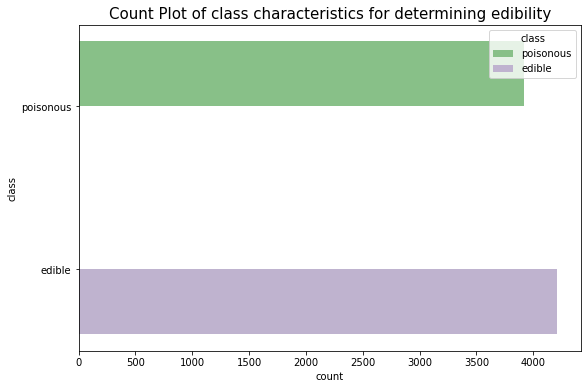

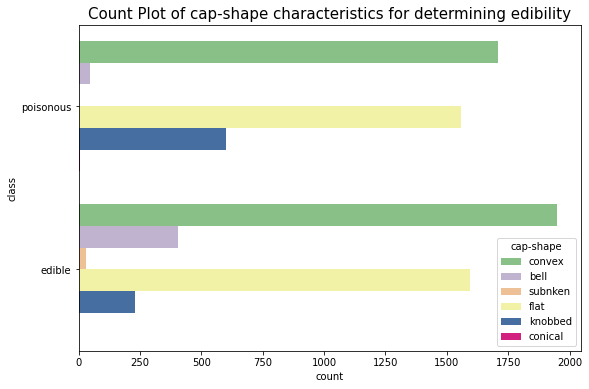

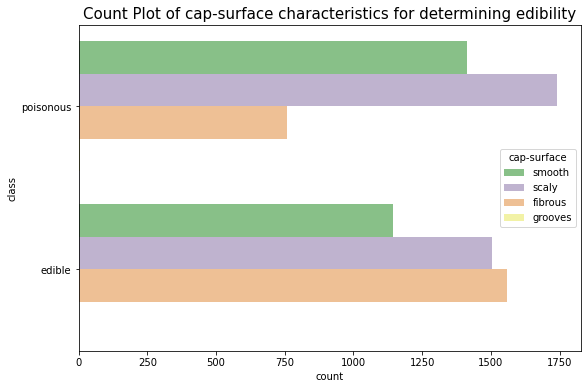

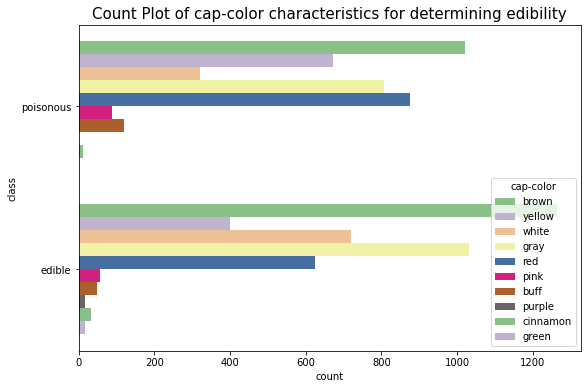

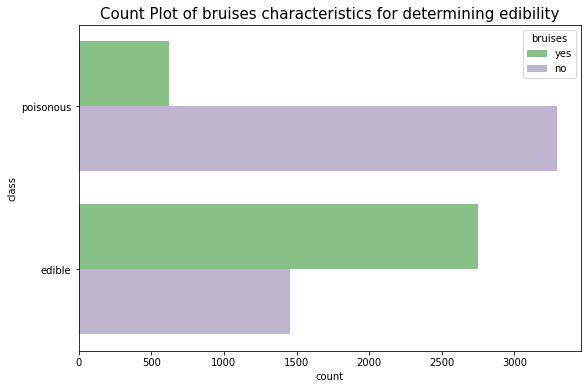

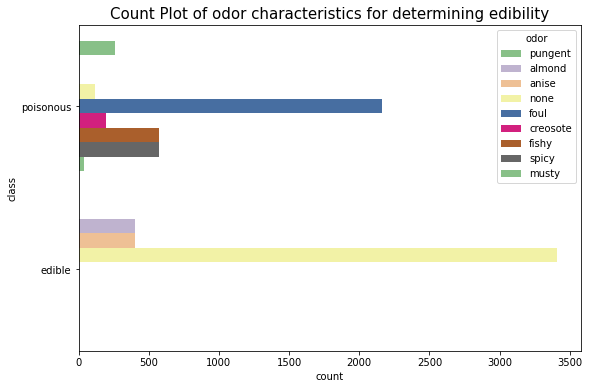

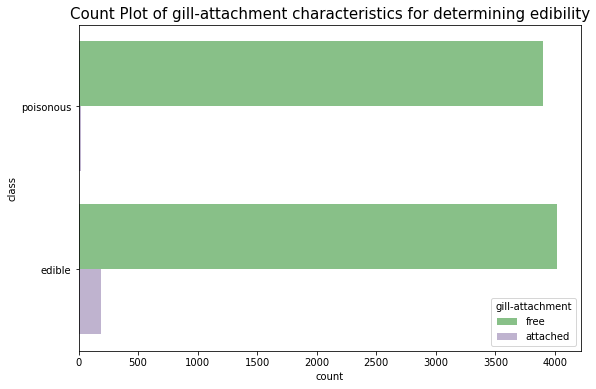

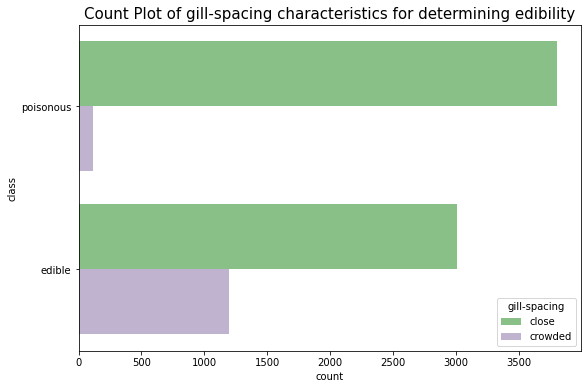

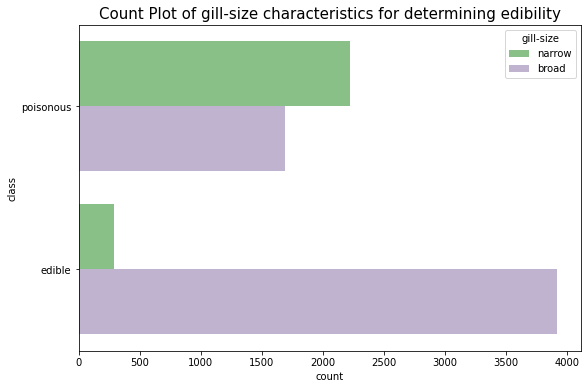

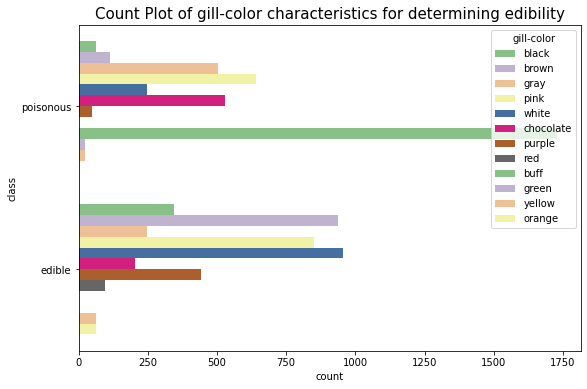

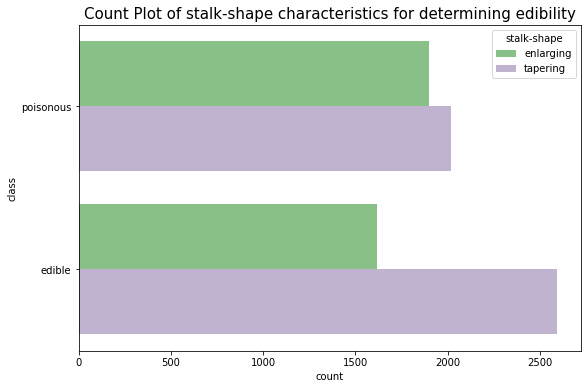

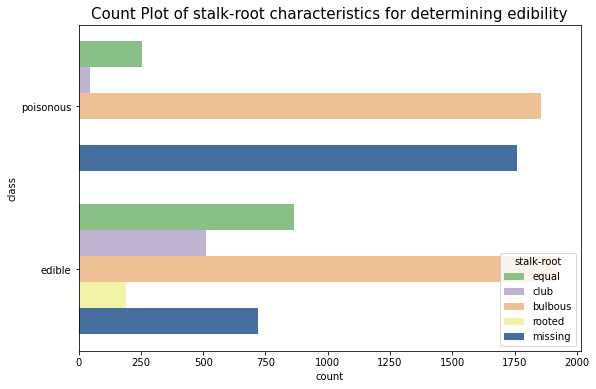

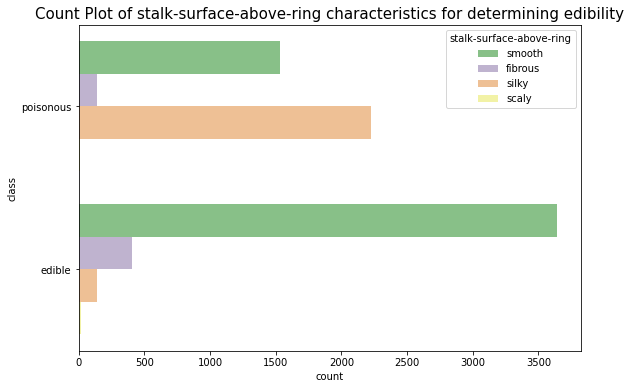

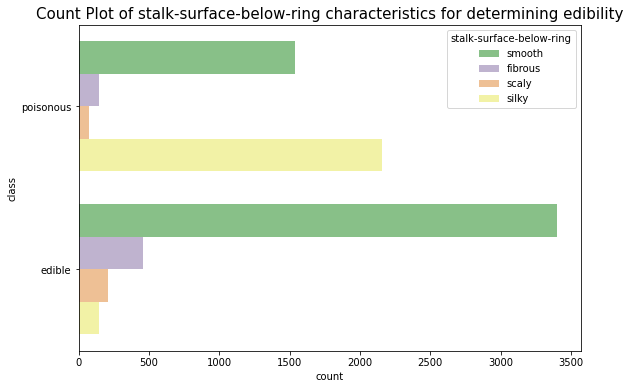

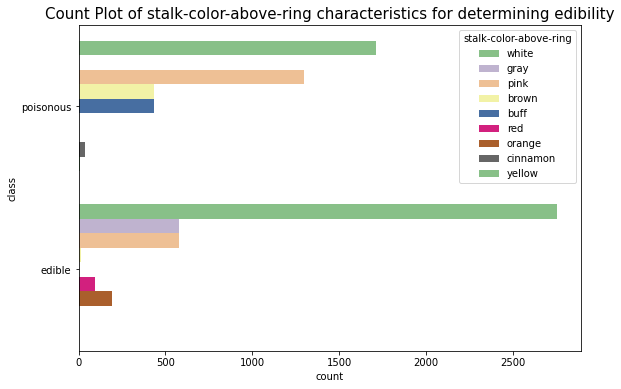

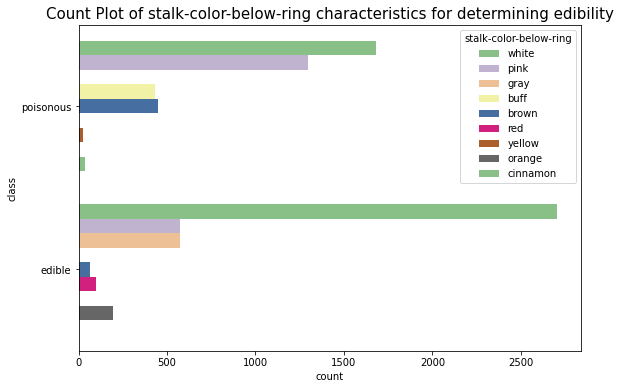

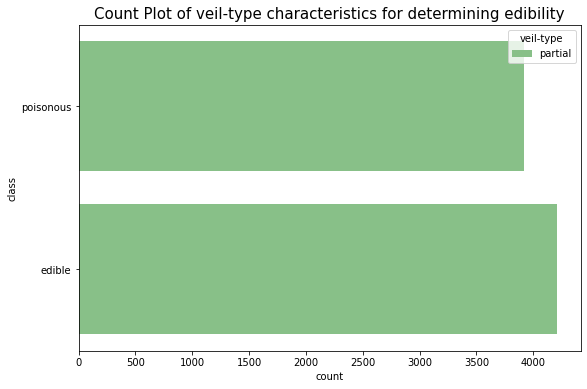

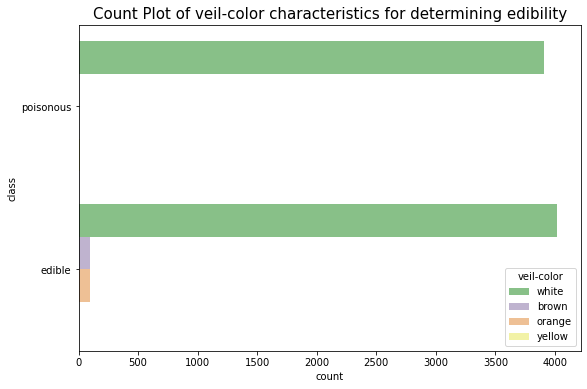

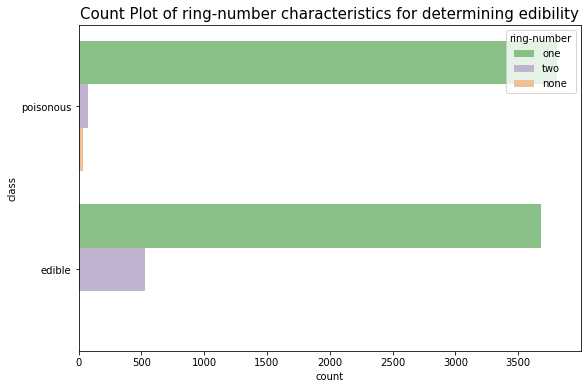

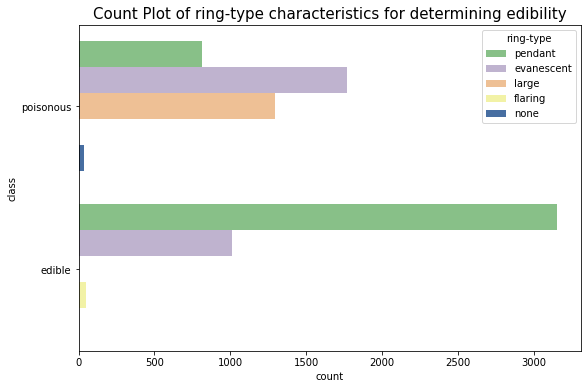

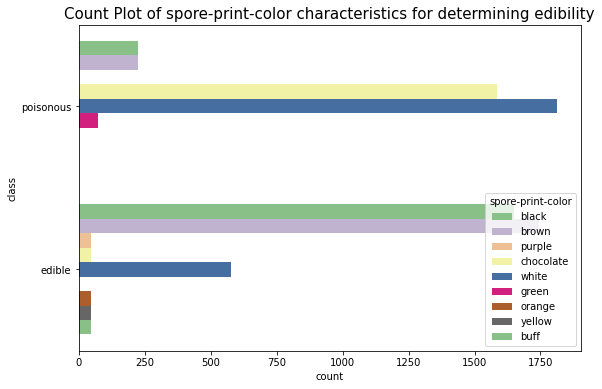

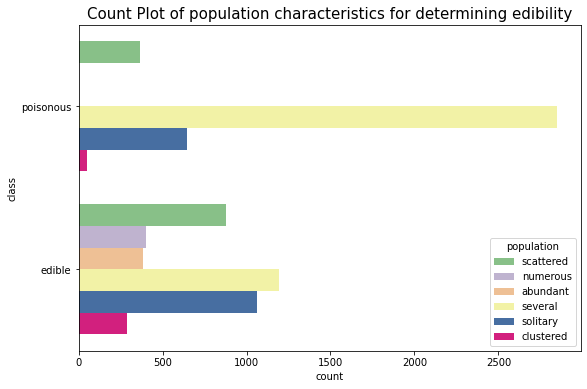

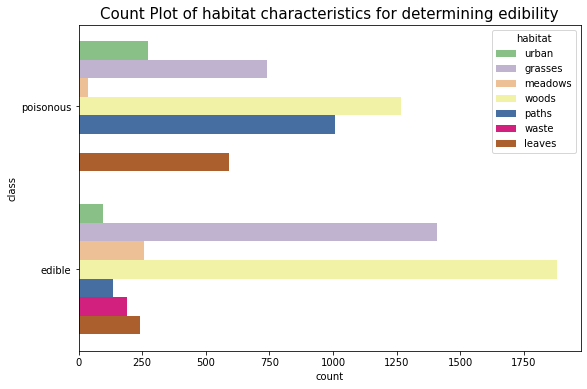

In [13]:
for column in shrooms:
    plt.figure(figsize = (9, 6))
    sns.countplot(y = 'class', hue =  column, data = shrooms, palette = "Accent")
    plt.title(f'Count Plot of {column} characteristics for determining edibility', size = 15);

### Takeaways from the above visuals

The following insights are some of the most glaring from the visuals above. The takeaways from the above visuals are not limited to what's listed below, and 

- `Cap shape`
    - over twice as many mushroomss with a knobbed cap shape are piosonous as are edible.
    - about 5 times more mushrooms with a bell-shaped cap are edible than are piosonous.
- `Cap surface` about twice as many mushrooms with a fibrous cap surface are edible rather than poisonous.
- `Bruises` edible mushrooms are more than 5 times likely to bruise than are poisonous mushrooms
- `Odor` edible mushrooms are far more likely to have no odor, whereas poisonous mushrooms are far more likely to smell foul.
- `Gill spacing` if a mushroom has crowded gill spacing (as opposed to close), it's fare more likely to be an edible mushroom.
- `Gill size` mushrooms with narrow gill sizes are more likely to be poisonous, while mushrooms with broad gill sizes are more likely to be edible.
- `Gill color` edible mushrooms are more likely to have gills that are brown, purple, or white. Poisonous mushrooms are more likely to have gills that are buff or gray.
- `Veil type` appears to follow the natural distribution of poisonous-to-edible mushrooms within the dataset.
- `Spore print color` is more likely to be edible if its black or brown.


Something else that may help us to determine the most and least impactful variables is a `heatmap` of the correlation coefficients. Doing this will require `dummy variables`, perhape the most key component of feature engineering to be done in this notebook. 

## Feature Engineering

The biggest (and perhaps only) amount of feature engineering required will require creating `dummy variables` for the mushroom dataset.

The easiest way to create all the `dummy variables` is to create a function that can create all the variables and thgen drop the original column from the `shrooms` dataset. Once the dummies have been created, the original dataset is no longer needed.

#### Need for dummy variables

Looking at the unique values in each column of the dataset, we can see that there are a lot of unique non-numerical values in the shrooms dataset. This means we're going to have to create a new column for each unique variable for each unique column. These will be `dummy variables` that can be used for quantitative analysis.

How many dummy variables, exactly? Let's take a look and see

In [14]:
# Create a new dataframe that's simply a description of the shrooms dataset. 
dummy_preview = shrooms.describe()
dummy_preview

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
# Now we can create a column called 'sum' and sum all the unqiue values in the dataset
dummy_preview['sum'] = dummy_preview.sum(axis = 1)
dummy_preview['sum']

count                                                186852
unique                                                  119
top       edibleconvexscalybrownnononefreeclosebroadbuff...
freq                                                 108158
Name: sum, dtype: object

#### 119 Dummy Variables

Looking at the number above, we can see that we're going to have to create 119 dummy variables for this dataset. We'll create those variables when we come to the `Feature Engineering` portion of the notebook.

In [16]:
# Function to dummify the shrooms dataframe
def dummify(df):
    
    # Create new, empty dataframe, which we'll append dummy variables to
    df2 = pd.DataFrame()
    
    # Create a for loop to dummify shrooms columns 1 by 1
    for column in df:
        
        # Create the dummies unique to one column
        dummy = pd.get_dummies(df[column], prefix = column, drop_first = False)
        
        # Add dummies to df2 column by column
        for i in dummy:
            df2[i] = dummy[i]
            
    # Return the new dataframe        
    return df2

In [17]:
shrooms = dummify(shrooms)
shrooms

,class_edible,class_poisonous,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_subnken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [18]:
# Our new dataframe has 8,124 rows and 192 columns
shrooms.shape

(8124, 119)

In [19]:
# A list of the columns in the dataframe 'shrooms'
shrooms.columns

Index(['class_edible', 'class_poisonous', 'cap-shape_bell',
       'cap-shape_conical', 'cap-shape_convex', 'cap-shape_flat',
       'cap-shape_knobbed', 'cap-shape_subnken', 'cap-surface_fibrous',
       'cap-surface_grooves',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=119)

In [20]:
def count_averages(df):
    df2 = pd.DataFrame()
    df2['variable'] = [column for column in df]
    df2['average'] = [df[column].mean() for column in df]
    return df2

averages = count_averages(shrooms)
averages

,variable,average
0,class_edible,0.517971
1,class_poisonous,0.482029
2,cap-shape_bell,0.055638
3,cap-shape_conical,0.000492
4,cap-shape_convex,0.450025
...,...,...
114,habitat_meadows,0.035943
115,habitat_paths,0.140817
116,habitat_urban,0.045298
117,habitat_waste,0.023634


In [21]:
averages.sort_values(by = 'average', ascending = False).head(10)

,variable,average
84,veil-type_partial,1.000000
87,veil-color_white,0.975382
34,gill-attachment_free,0.974151
90,ring-number_one,0.921713
35,gill-spacing_close,0.838503
37,gill-size_broad,0.690793
61,stalk-surface-above-ring_smooth,0.637125
65,stalk-surface-below-ring_smooth,0.607582
22,bruises_no,0.584441
52,stalk-shape_tapering,0.567208


These letters don't do us much good to better understand our data. How are we supposed to know what each letter means?
Luckily, the dataset came with a table that explains each value in more detail. In the cell below, I've created a dictionary of each term as it corresponds to each letter, which we can then use to change the column names in our dataset

**Just by looking at the above dataframe, we can see that 100% of the mushrooms in our dataset have a Partial Veil Type, 97.5% have a Veil Color that's White, 97.4% have a Gill Attachment that's categorized as being Free, and 92% have a Ring Number of One**

Let's import some data visualization libraries for some further EDA

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

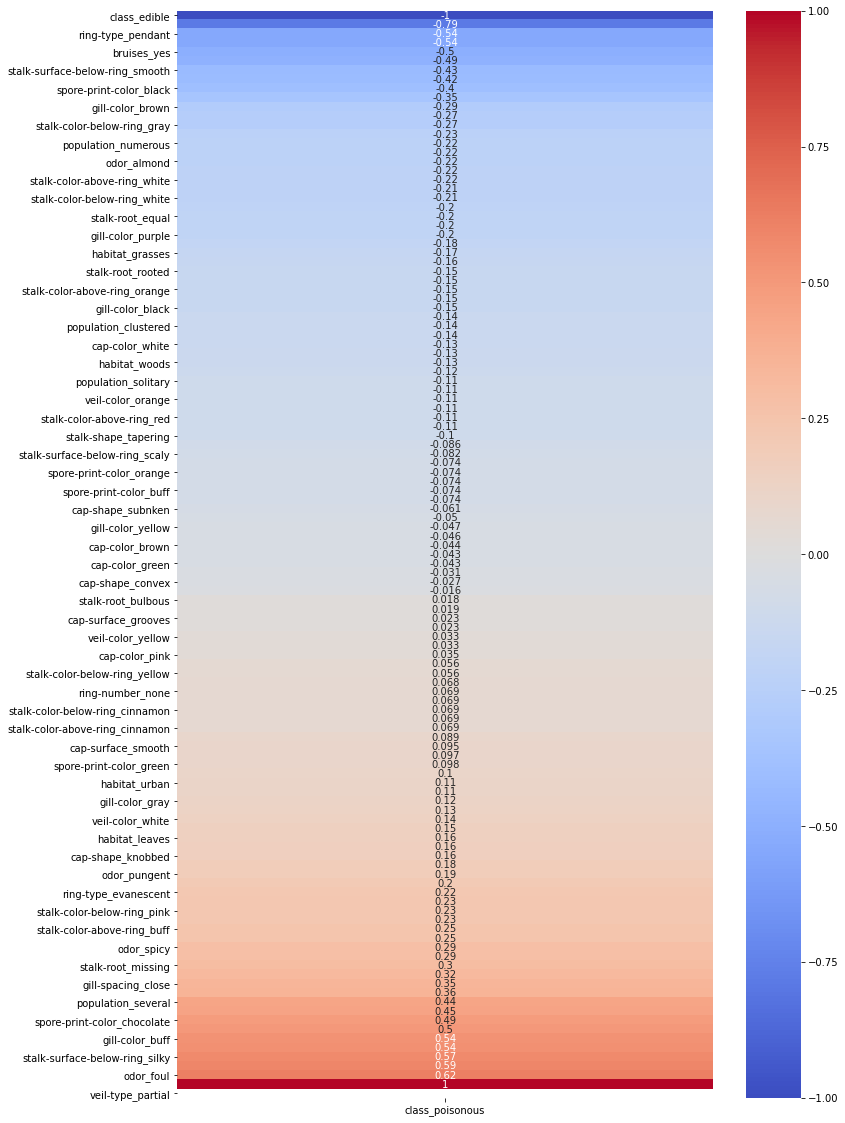

In [28]:
plt.figure(figsize = (12, 20))
sns.heatmap(shrooms.corr()[['class_poisonous']].sort_values('class_poisonous'),
            cmap = 'coolwarm',
            annot = True);

In [ ]:
sns.heatmap(shrooms['class_edible'].corr(),
            cmap = 'coolwarm',
            annot = True);

**What exactly would be considered a good model?** This question is unique to each data science problem. Let's look at the percentage of edible mushrooms in our dataset:

In [ ]:
# The following number represents the percentage of edible mushrooms in our dataset:
shrooms[shrooms['class'] == 'e'].shape[0] / shrooms.shape[0]

#### 51.79% of mushrooms in our dataset at edible.

0.5179 indicates the number of edible mushrooms in our dataset. This might lead some to say that any model with an accuracy score above 51.79% is superior, as it outperforms the natural percentage of edible and poisonous mushrooms in the dataset. However, the consequences of eating a poisonous mushroom are dire: even one misclassification can result in death. This is a good reminder that every data science problem is unique and should be approached as such.